<a href="https://colab.research.google.com/github/creatVish/Ecommerce-Sales-Analysis/blob/main/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Odin Collab/Zomato data_1/zomato_restaurants_in_India.csv')

In [31]:
df.head()

,res_id,name,establishment,address,city,city_id,locality,latitude,longitude,zipcode,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,NaN,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,282010,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,282002,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,NaN,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   address               211810 non-null  object 
 4   city                  211944 non-null  object 
 5   city_id               211944 non-null  int64  
 6   locality              211944 non-null  object 
 7   latitude              211944 non-null  float64
 8   longitude             211944 non-null  float64
 9   zipcode               48757 non-null   object 
 10  country_id            211944 non-null  int64  
 11  locality_verbose      211944 non-null  object 
 12  cuisines              210553 non-null  object 
 13  timings               208070 non-null  object 
 14  average_cost_for_two  211944 non-null  int64  
 15  

In [33]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [34]:
df.isnull().sum()

res_id                       0
name                         0
establishment                0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [35]:
##In address column I filling with 'Unknown' in null values

df['address'].fillna('Unknow', inplace=True)

In [36]:
## In zipcode column I filling with upper value in null values
df['zipcode'].fillna(method='ffill', inplace=True)
df['zipcode'].fillna(method='bfill', inplace=True)

In [37]:
#### In cuisines column I filling with mode value of cuisines in null values
mode_cuisines = df['cuisines'].mode()[0]
df['cuisines'].fillna(mode_cuisines, inplace=True)

In [38]:
#### In cuisines column I filling with mode value of cuisines in null values
df['timings'].fillna(method='bfill', inplace=True)

In [39]:
df['opentable_support'].fillna(0, inplace=True)

In [40]:
df.isnull().sum()

res_id                  0
name                    0
establishment           0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
zipcode                 0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64

In [41]:
df['res_id'].duplicated().sum()


156376

In [42]:
df.drop_duplicates(subset='res_id',inplace=True)

In [43]:
df['res_id'].duplicated().sum()

0

In [44]:
##imprting regular expresion to remove special char from string
import re


In [45]:
strng = str(df['establishment'])

In [46]:
def remove_char(string):
  new_string = re.sub(r'[^a-zA-Z]', "", string)
  return new_string
df['establishment'] = df['establishment'].apply(remove_char)
df.head()

,res_id,name,establishment,address,city,city_id,locality,latitude,longitude,zipcode,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,QuickBites,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,282001,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,QuickBites,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,QuickBites,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,282010,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,QuickBites,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,282002,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,CasualDining,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,282002,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [47]:
def remove_char(string):
  new_string = re.sub(r'[^a-zA-Z]', "", string)
  return new_string
df['highlights'] = df['highlights'].apply(remove_char)

In [48]:
df.head()

,res_id,name,establishment,address,city,city_id,locality,latitude,longitude,zipcode,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,QuickBites,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,282001,...,2,Rs.,LunchTakeawayAvailableCreditCardDinnerCashAirC...,4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,QuickBites,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001,...,2,Rs.,DeliveryNoAlcoholAvailableDinnerTakeawayAvaila...,4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,QuickBites,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,282010,...,1,Rs.,NoAlcoholAvailableDinnerTakeawayAvailableBreak...,4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,QuickBites,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,282002,...,1,Rs.,TakeawayAvailableCreditCardLunchDeliveryBreakf...,4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,CasualDining,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,282002,...,3,Rs.,LunchServesAlcoholCashCreditCardDinnerDebitCar...,4.9,Excellent,470,291,0.0,1,-1


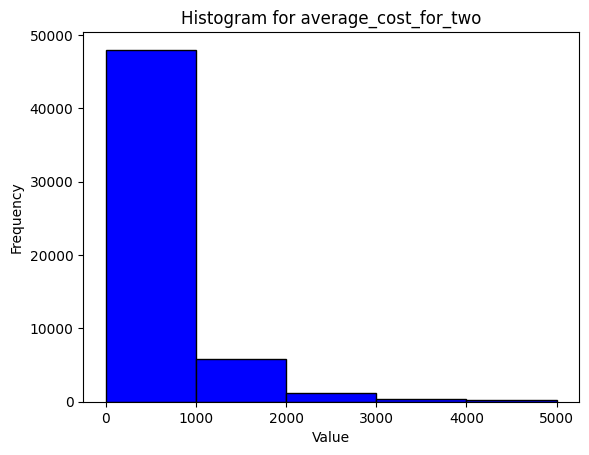

In [57]:
bins = [0,1000, 2000,3000, 4000, 5000]
plt.hist(df['average_cost_for_two'], bins=bins, color='blue', edgecolor='black')

plt.title('Histogram for average_cost_for_two')
plt.xlabel('Value')
plt.ylabel('Frequency')
# plt.xticks([0, 1000, 2000, 3000], ['0', '1000', '2000', '3000'])

plt.show()

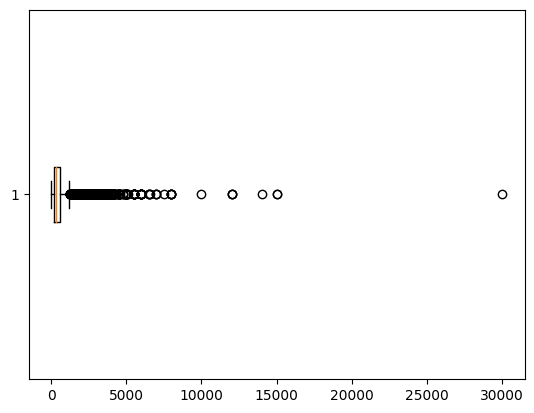

In [65]:
plt.boxplot(df['average_cost_for_two'], vert=False)
plt.show()

In [68]:
q1 = df['average_cost_for_two'].quantile(0.25)

In [69]:
q3 = df['average_cost_for_two'].quantile(0.75)


In [71]:
IQR = q3 - q1

In [72]:
IQR

400.0

In [75]:
upper_limit = q3 + 1.5 * IQR
upper_limit

1200.0

In [76]:
lower_limit = q1 - 1.5 * IQR
lower_limit

-400.0

In [86]:
df['average_cost_for_two']df['average_cost_for_two'] > upper_limit

SyntaxError: invalid syntax (<ipython-input-86-3bf8da0c9f44>, line 1)

In [78]:
outliers

0         False
1         False
2         False
3         False
4         False
          ...  
211882    False
211925    False
211926    False
211940    False
211942    False
Name: average_cost_for_two, Length: 55568, dtype: bool